# Data Preprocessing using Python - Missing values


Learn how to effectively prepare data for successful data analytics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Missing values
## Detecting missing values
## Example of detecting missing values

In [2]:
pd.read_excel('data/table.xlsx')

,Unnamed: 0,Gender,Height,Year,GPA,Personality Type
0,0,1,190.0,Sophomore,NaN,ISTJ
1,1,1,189.0,Freshman,3.81,ESNJ
2,2,0,160.0,Freshman,NaN,ISTJ
3,3,1,181.0,Sophomore,3.95,INTP
4,4,1,NaN,Freshman,3.62,ISTJ
5,5,0,184.0,Freshman,3.87,NaN
6,6,0,172.0,Junior,3.31,ISTP


In [3]:
air_df = pd.read_csv('data/Airdata.csv')
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70


In [4]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [5]:
print('Number of missing values:')
for col in air_df.columns:
    n_MV = sum(air_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132


## Causes of missing values
## Types of missing values
## Diagnosis of missing values
### Diagnosing the missing values in NO2_Location_A
#### Diagnosing the missing values based on Temperature

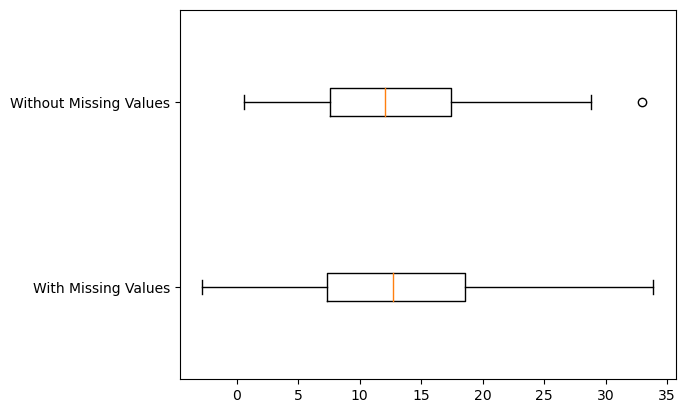

In [6]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['With Missing Values','Without Missing Values']

box_sr = pd.Series('',index = BM_MV.unique())

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = air_df[BM].Temperature
    
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)
plt.show()

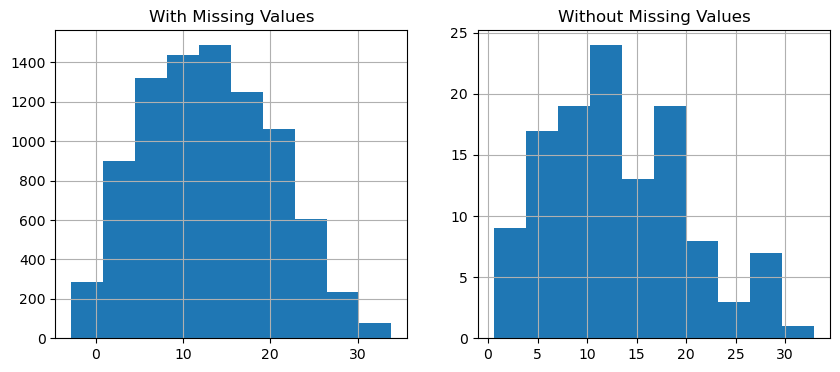

In [7]:
BM_MV = air_df.NO2_Location_A.isna()
temp_range = (air_df.Temperature.min(),air_df.Temperature.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

In [8]:
from scipy.stats import ttest_ind
BM_MV = air_df.NO2_Location_A.isna()
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature)

Ttest_indResult(statistic=0.05646499065315542, pvalue=0.9549726689684548)

In [9]:
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature).pvalue

0.9549726689684548

#### Diagnosing the missing values based on all the numerical attributes 

In [10]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Temperature:


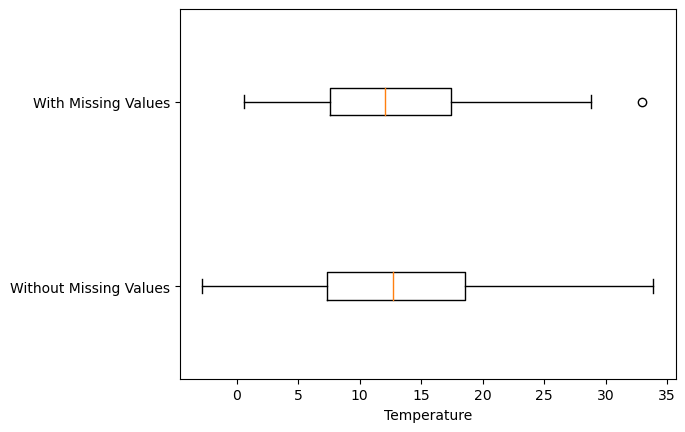

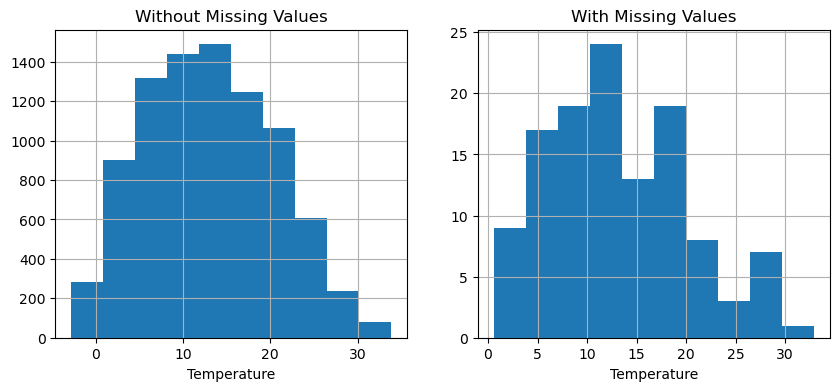

p-value of t-test: 0.9549726689684548
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


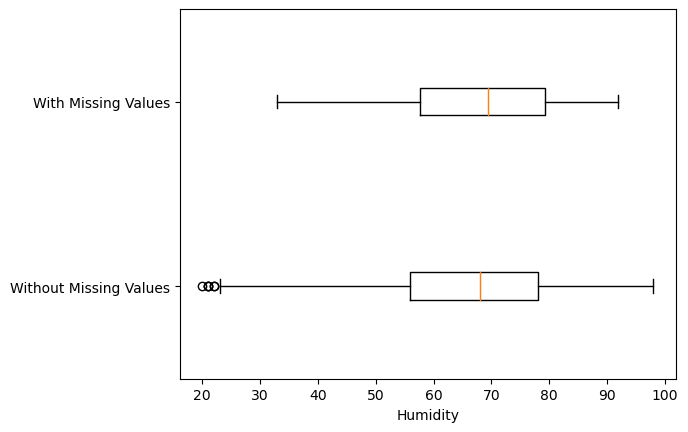

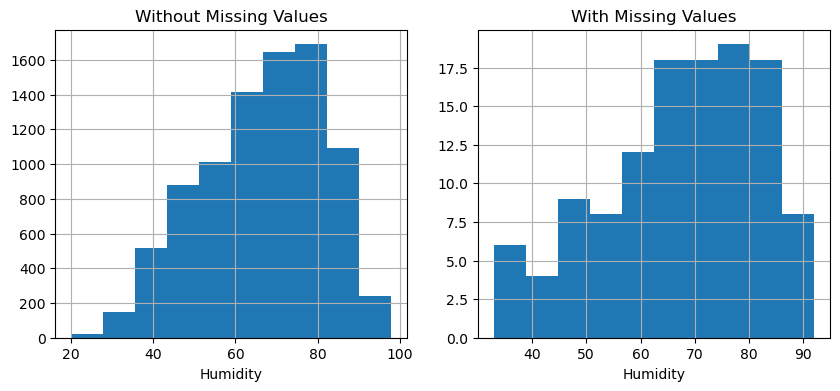

p-value of t-test: 0.5593319830352679
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


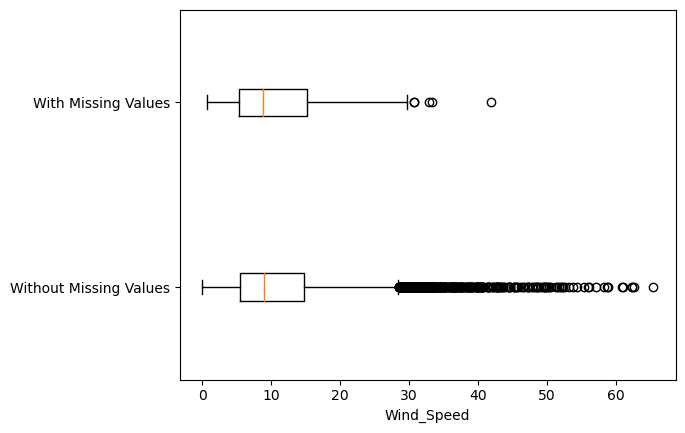

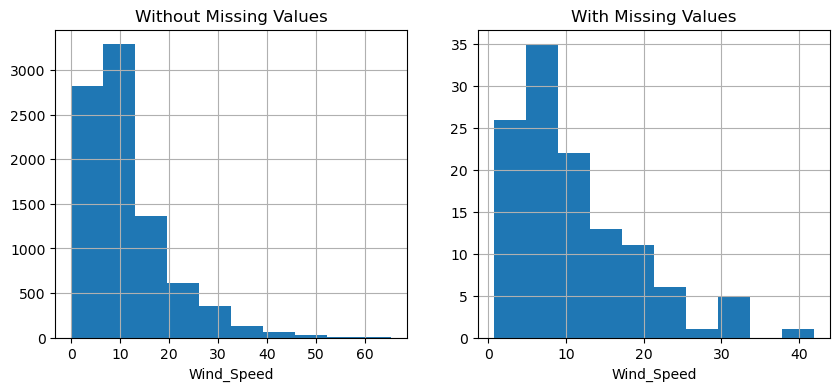

p-value of t-test: 0.8172472856083665
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


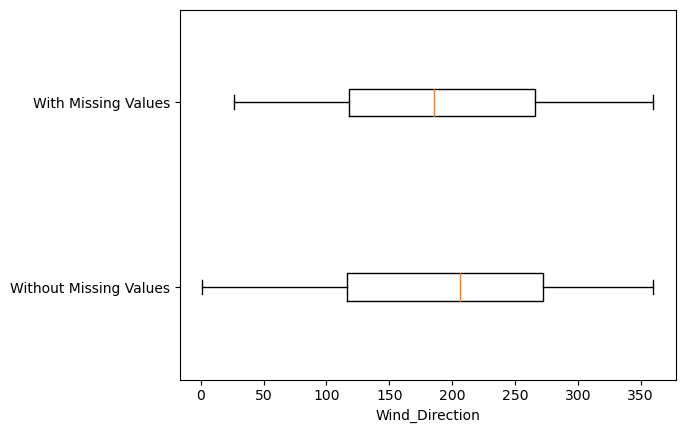

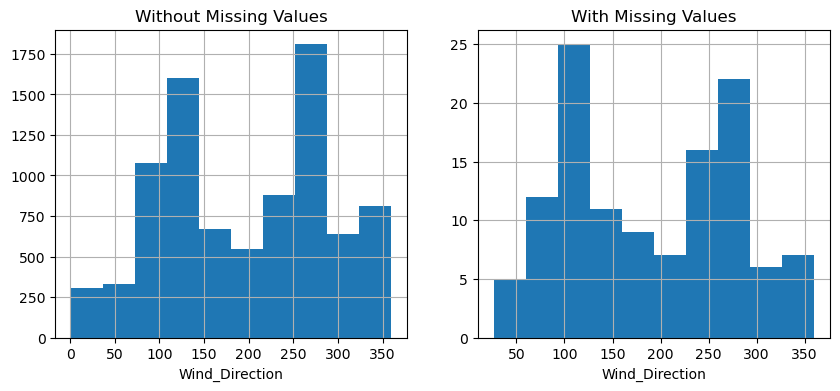

p-value of t-test: 0.39869195396670654
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [11]:
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_A.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

#### Diagnosing the missing values based on weekday

In [12]:
air_df.DateTime = pd.to_datetime(air_df.DateTime)
air_df['month'] = air_df.DateTime.dt.month
air_df['day'] = air_df.DateTime.dt.day
air_df['hour'] = air_df.DateTime.dt.hour
air_df['weekday'] = air_df.DateTime.dt.day_name()

In [13]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


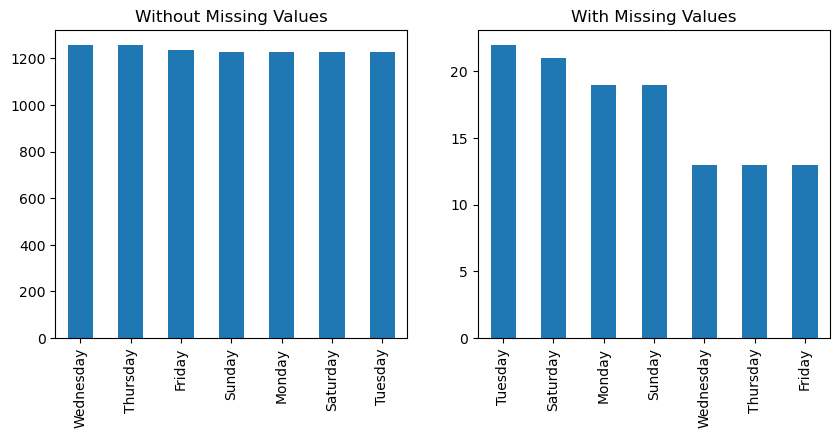

In [14]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['Without Missing Values','With Missing Values']

plt.figure(figsize=(10,4))
for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].weekday.value_counts().plot.bar()
    plt.title(MV_labels[i])
plt.show()

In [15]:
from scipy.stats import chi2_contingency
BM_MV = air_df.NO2_Location_A.isna()
contigency_table = pd.crosstab(BM_MV,air_df.weekday)
contigency_table

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [16]:
chi2_contingency(contigency_table)

(6.048964133655503,
 0.41772751510388023,
 6,
 array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
         1254.62295082, 1230.95081967, 1254.62295082],
        [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
           17.37704918,   17.04918033,   17.37704918]]))

#### Diagnosing the missing values based on all the categorical attributes 

In [17]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for month:


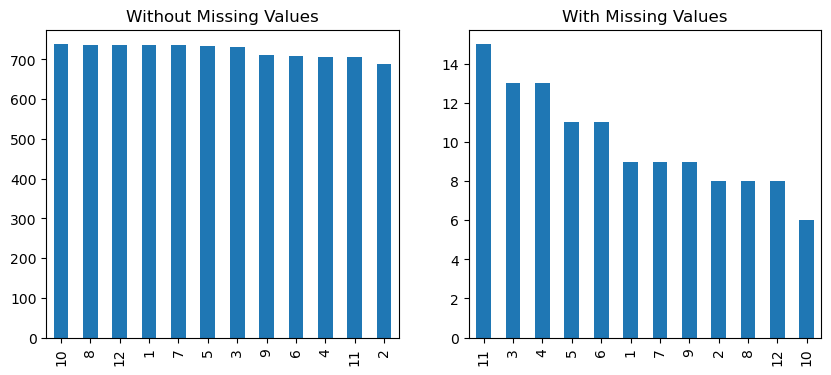

p-value of Chi_squared test: 0.7096565832929861
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


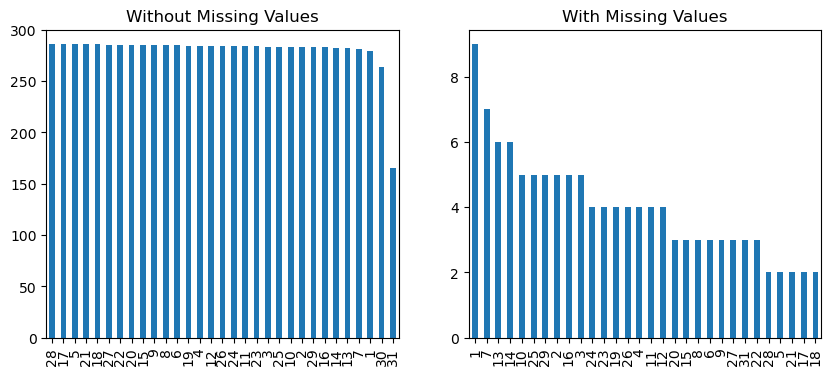

p-value of Chi_squared test: 0.8040640724986007
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


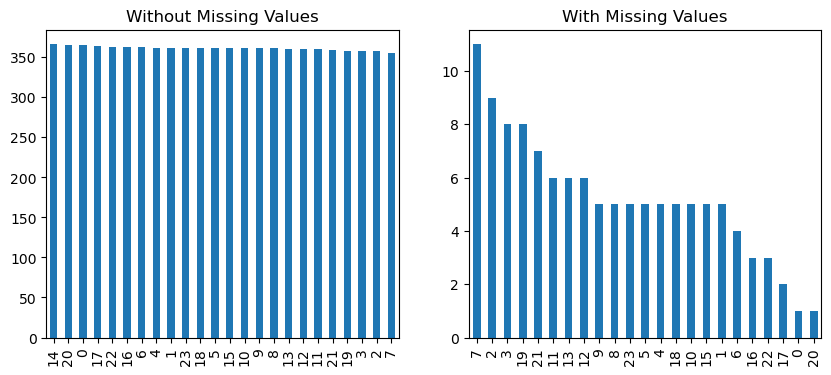

p-value of Chi_squared test: 0.12725321642668141
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


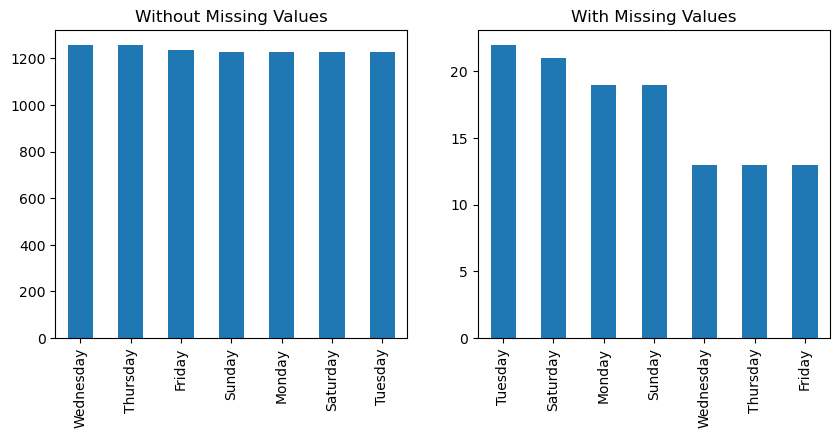

p-value of Chi_squared test: 0.41772751510388023
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [18]:
categorical_attributes = ['month', 'day','hour', 'weekday']

BM_MV = air_df.NO2_Location_A.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

### Diagnosing the missing values in NO2_Location_B

Diagnosis Analysis of Missing Values for Temperature:


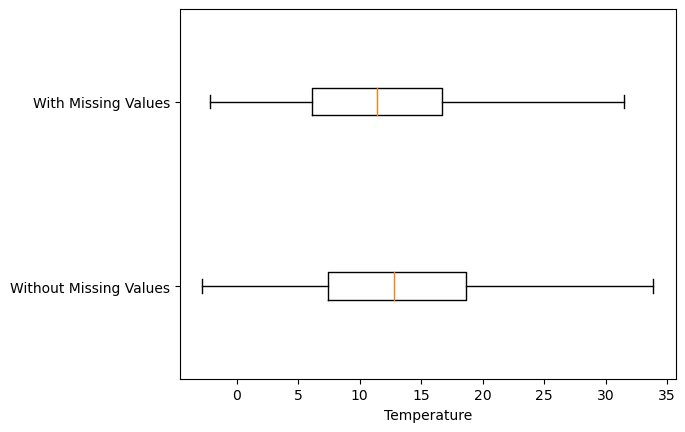

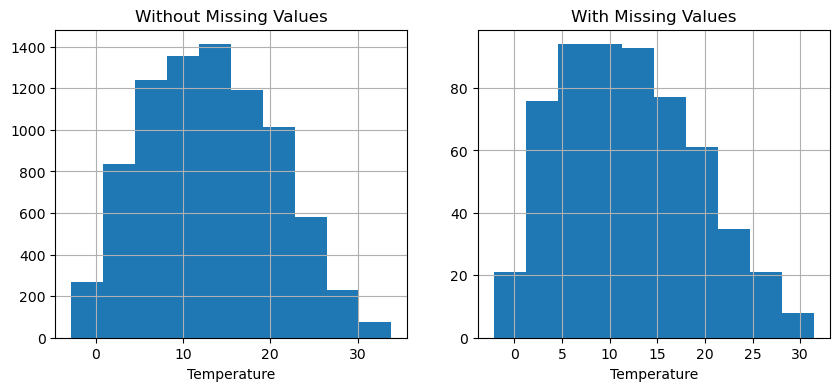

p-value of t-test: 0.00018958810621204925
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


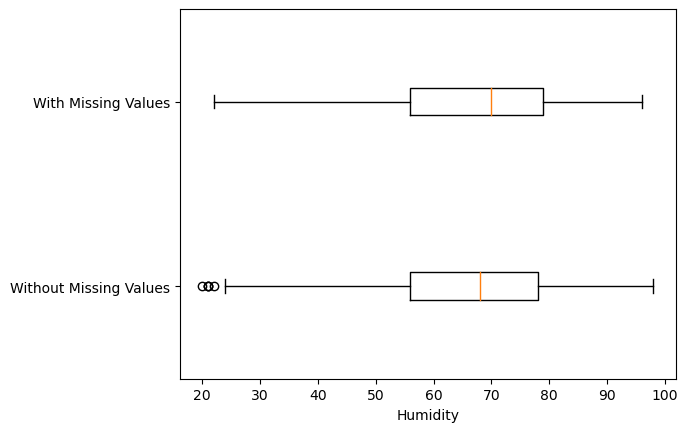

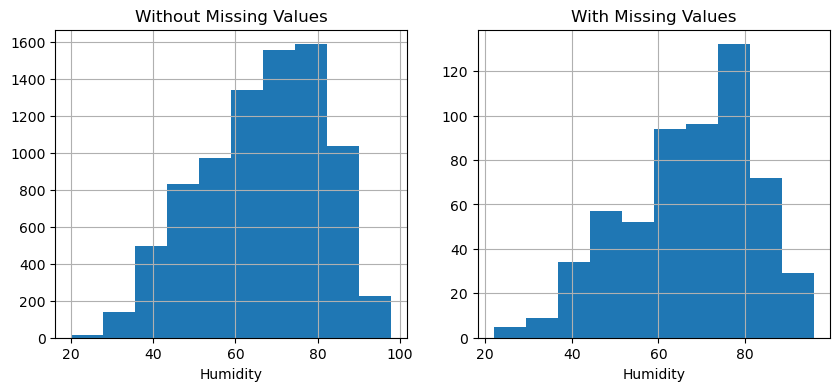

p-value of t-test: 0.43891454332709945
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


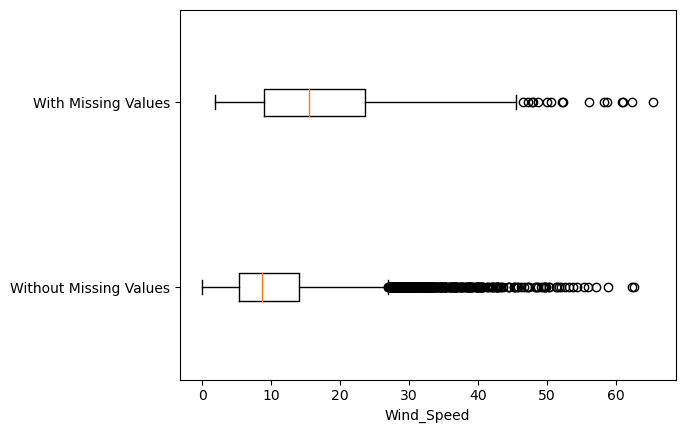

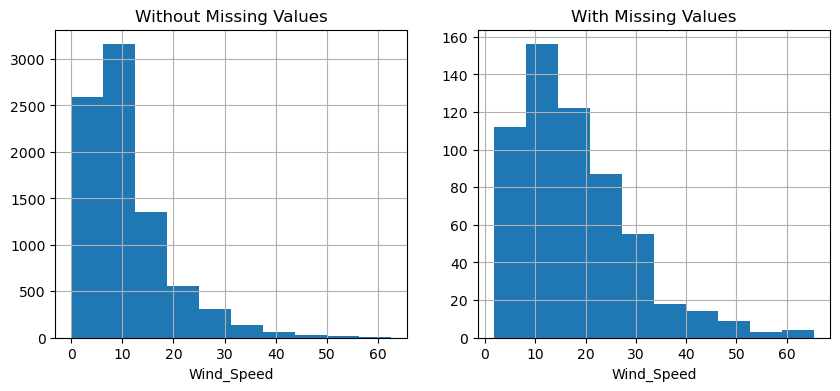

p-value of t-test: 1.3126894108159327e-85
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


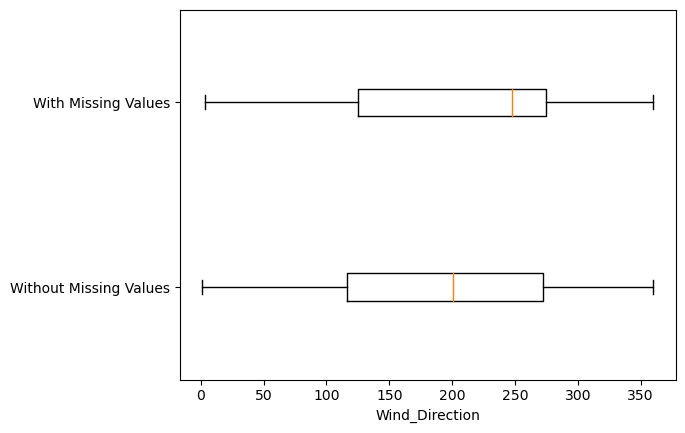

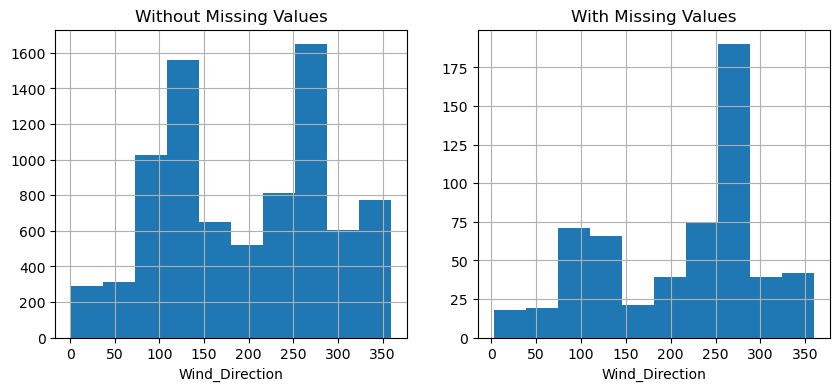

p-value of t-test: 5.8398056632254833e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


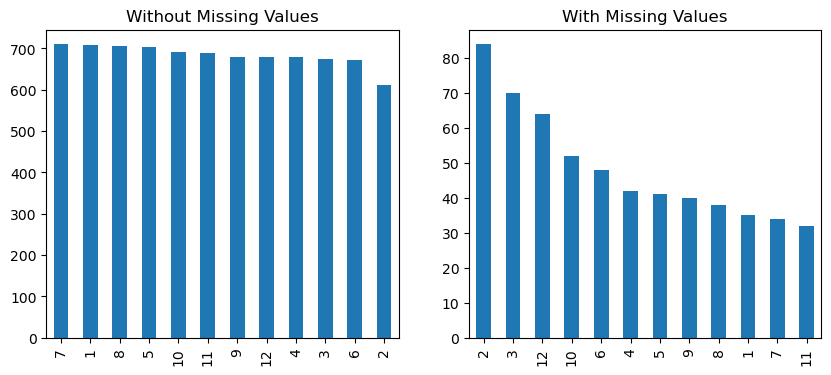

p-value of Chi_squared test: 1.8048364819875927e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


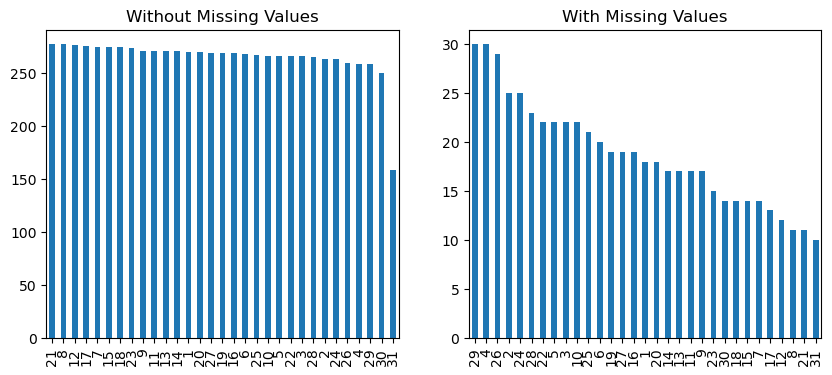

p-value of Chi_squared test: 0.034816691411564224
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


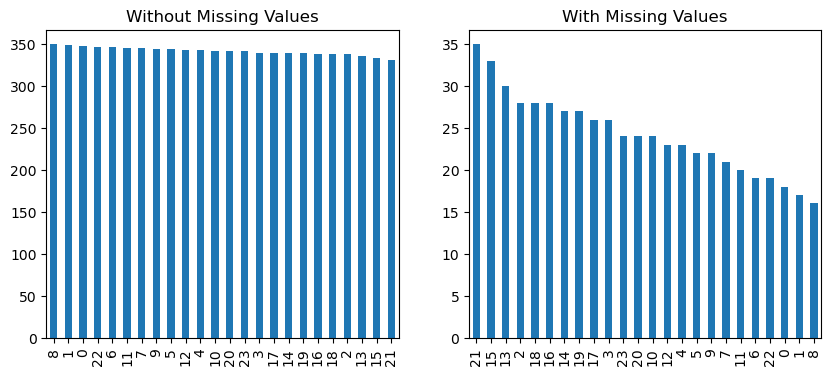

p-value of Chi_squared test: 0.3949474320151337
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


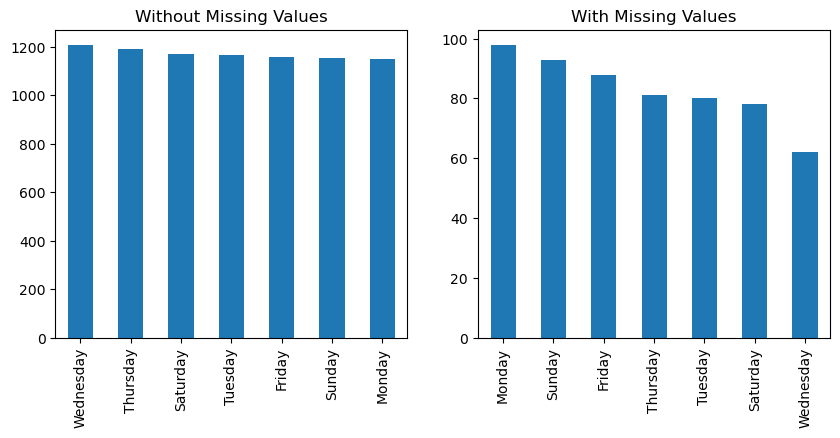

p-value of Chi_squared test: 0.07073083108612685
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [19]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_B.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

### Diagnosing the missing values in NO2_Location_C

Diagnosis Analysis for Temperature:


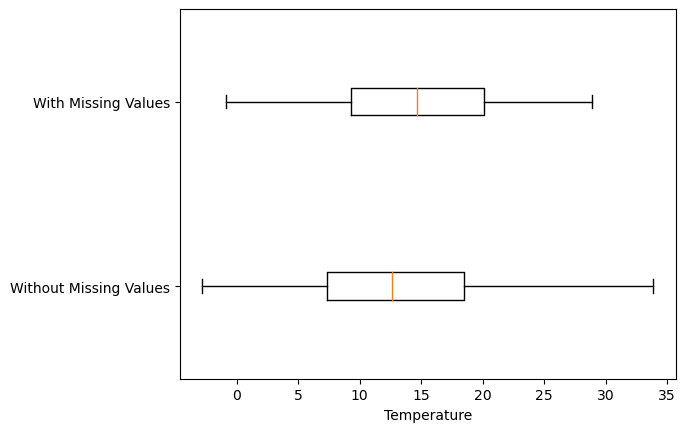

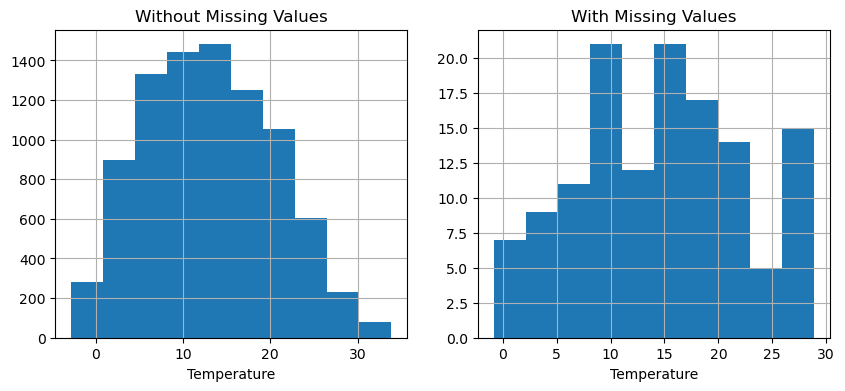

p-value of t-test: 0.01981913552818646
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Humidity:


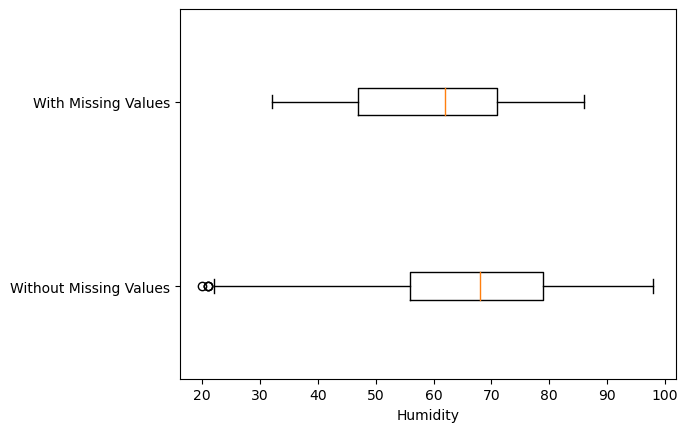

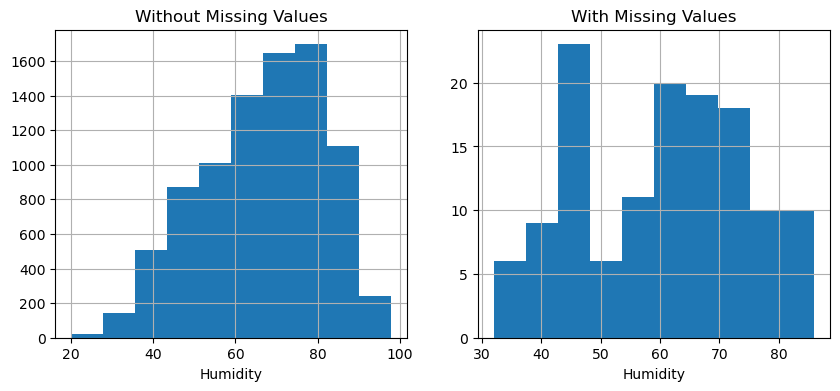

p-value of t-test: 8.179400599849167e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Wind_Speed:


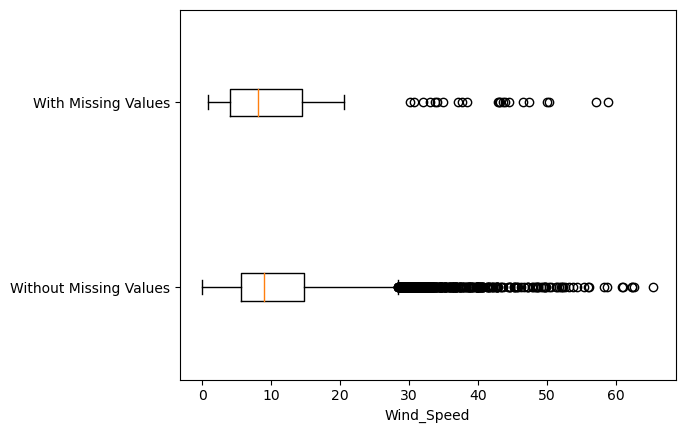

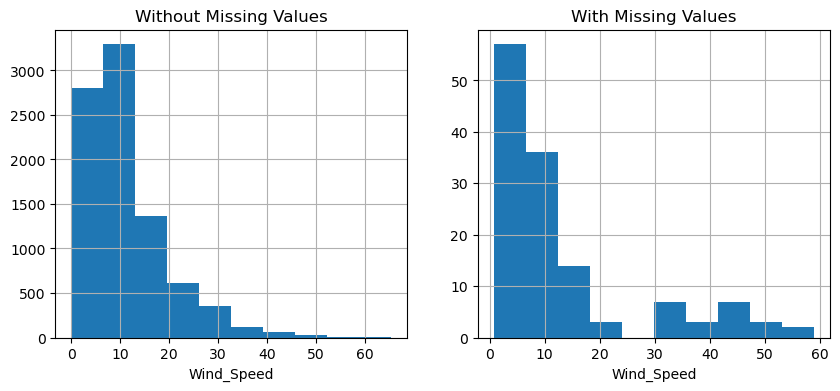

p-value of t-test: 0.01359796253829262
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Wind_Direction:


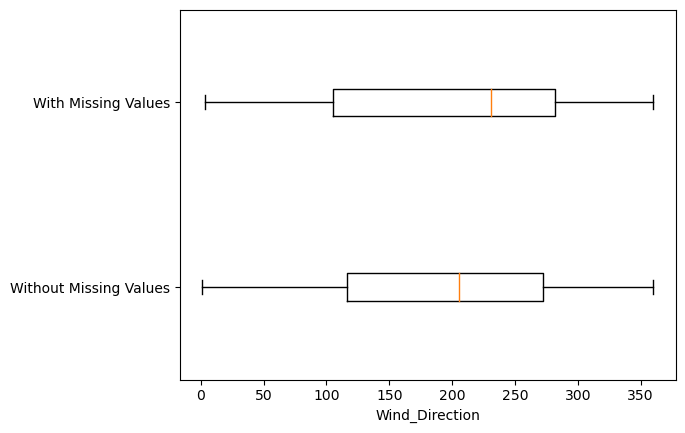

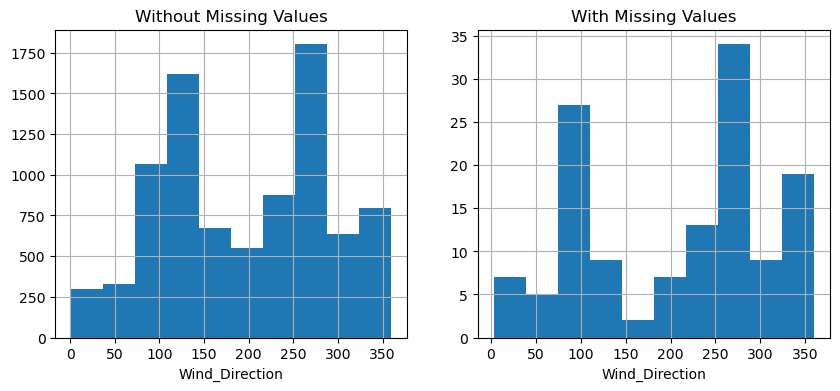

p-value of t-test: 0.3083081973623661
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for month:


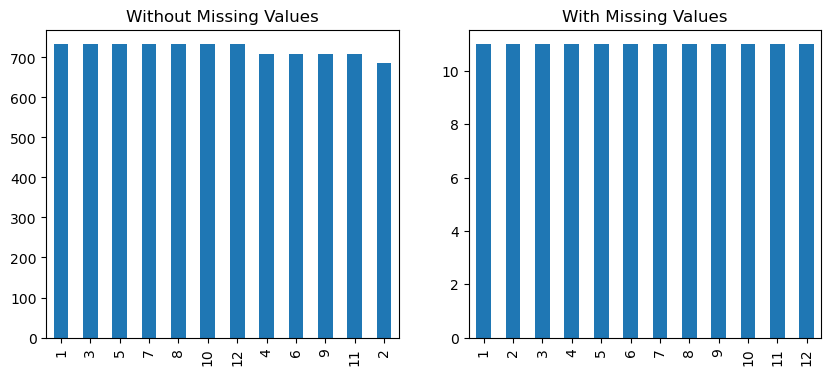

p-value of Chi_squared test: 0.9999999999839941
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for day:


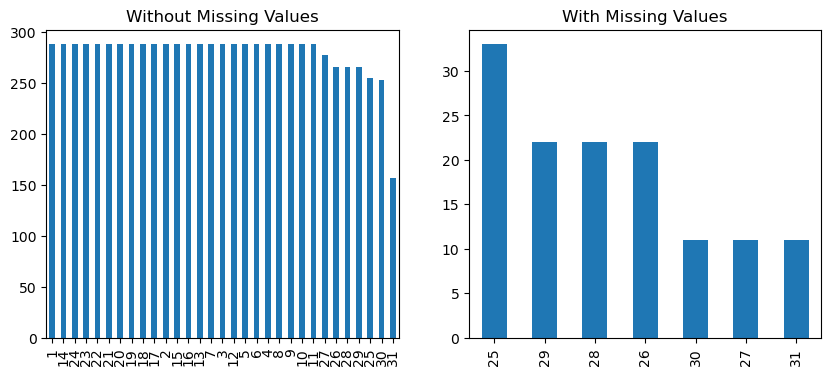

p-value of Chi_squared test: 4.5607973056357013e-101
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for hour:


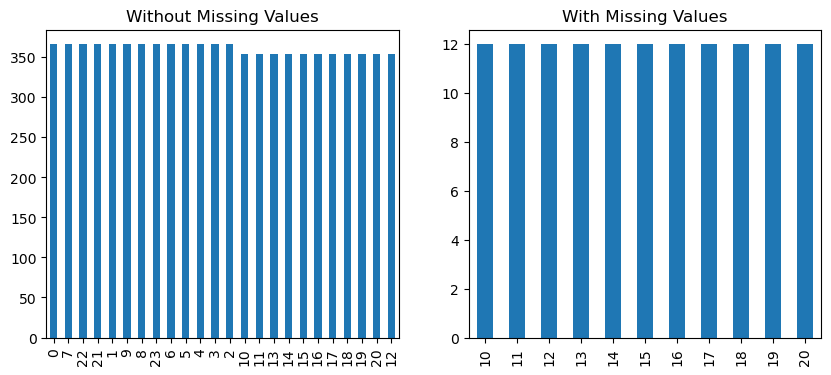

p-value of Chi_squared test: 3.3850851028854862e-22
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for weekday:


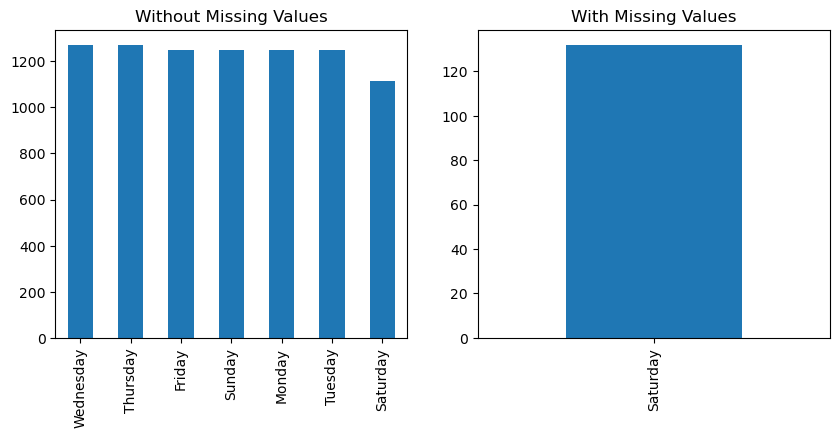

p-value of Chi_squared test: 1.554165460861991e-171
- - - - - - - - - divider - - - - - - - - - 


In [20]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity',
                        'Wind_Speed', 'Wind_Direction']
BM_MV = air_df.NO2_Location_C.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

## Dealing with missing values
### First Approach: Keep the missing value as is
### Second Approach: Remove data objects with missing values
### Third Approach: Remove the attributes with missing values
### Fourth Approach: Estimate and impute the missing values
### Choosing the right approach in dealing with missing values
### Example 1 

In [21]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


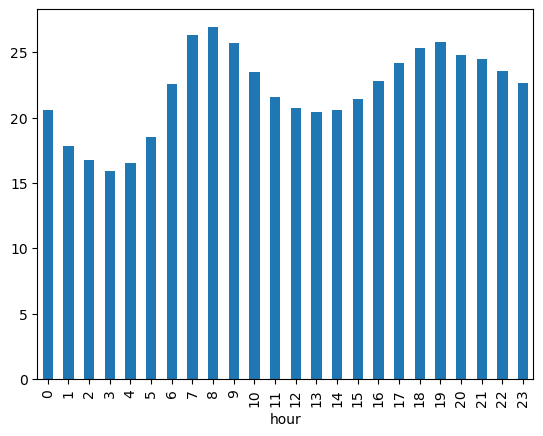

In [22]:
air_df.groupby('hour').NO2_Location_A.mean().plot.bar()
plt.show()

### Example 2 

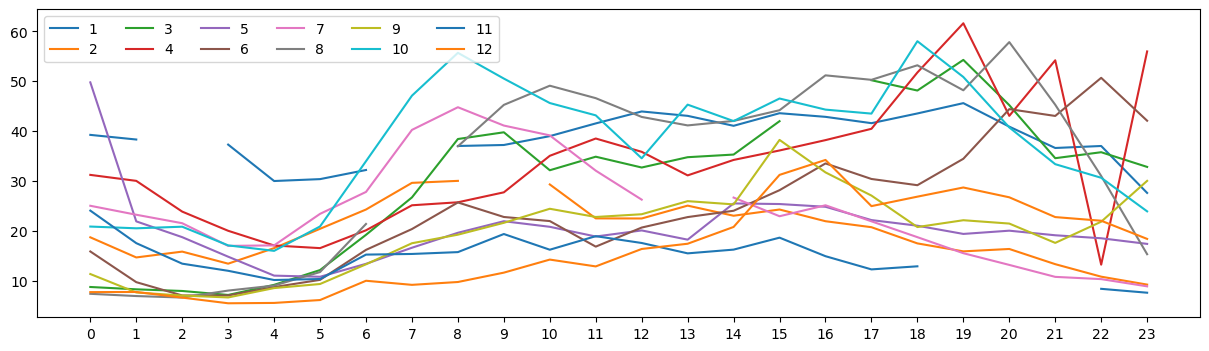

In [23]:
month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()
plt.figure(figsize=(15,4))

for mn in month_poss:
    BM = (air_df.month == mn) & (air_df.day ==1)
    wdf = air_df[BM]
    plt.plot(wdf.NO2_Location_A.values,
             label=mn)
plt.legend(ncol=6)
plt.xticks(hour_poss)
plt.show()

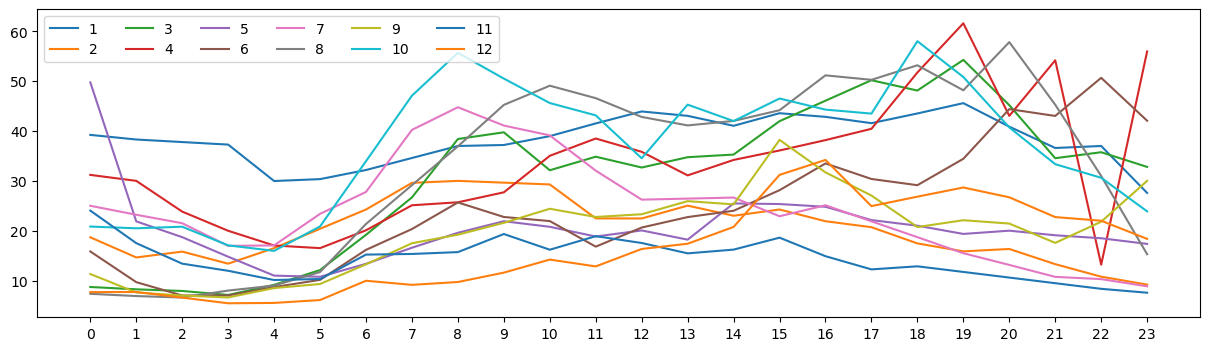

In [24]:
NO2_Location_A_noMV = air_df.NO2_Location_A.interpolate(method='linear')

month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()
plt.figure(figsize=(15,4))

for mn in month_poss:
    BM = (air_df.month == mn) & (air_df.day ==1)
    plt.plot(NO2_Location_A_noMV[BM].values,
             label=mn)
plt.legend(ncol=6)
plt.xticks(hour_poss)
plt.show()

### Example 3

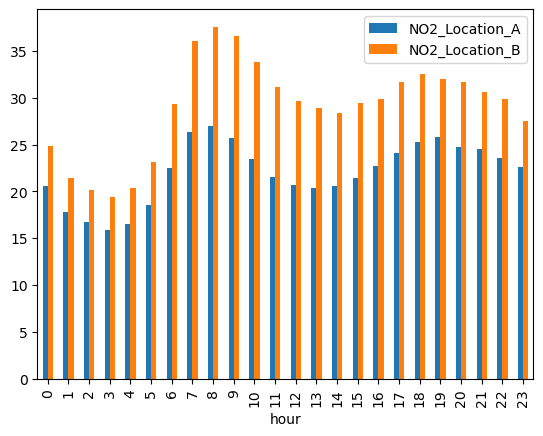

In [25]:
air_df.groupby('hour')[
    ['NO2_Location_A','NO2_Location_B']].mean().plot.bar()
plt.show()

### Example 4

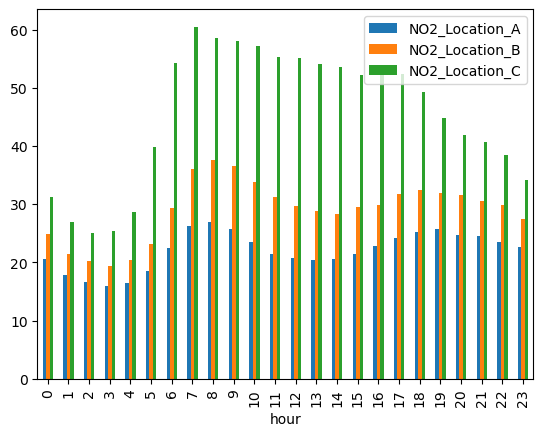

In [26]:
air_df.groupby('hour')[['NO2_Location_A','NO2_Location_B','NO2_Location_C']].mean().plot.bar()
plt.show()